In [1]:
reset()

#t1 will be zero
# position_of_time as a + b*t + c*t² + d*t³
# Matrix * vector(a,b,c,d) = vector(p1,p2,v1,v2) at p1,v1 at time=0 , p2,v2 at time=T
var('T')
M = matrix([[1,0,0,0], [1,T,T**2,T**3], [0,1,0,0], [0,1,2*T,3*T**2]])
text = " pos at zero \n pos at T \n vel at zero \n vel at T \n "

show(text,'=',M)

' pos at zero \n pos at T \n vel at zero \n vel at T \n ' '=' [    1     0     0     0]
[    1     T   T^2   T^3]
[    0     1     0     0]
[    0     1   2*T 3*T^2]

In [2]:
inv_M = M.inverse()
text = " a \n b \n c \n d "

#show(text,'=',inv_M)
show(inv_M)

[     1      0      0      0]
[     0      0      1      0]
[-3/T^2  3/T^2   -2/T   -1/T]
[ 2/T^3 -2/T^3 T^(-2) T^(-2)]

In [3]:
# going from 
#vector (p1,v1,p2,v2) --> (a,b,c,d)
var('p1','p2','v1','v2')
v = vector([p1,p2,v1,v2])
coeff = M.solve_right(v)
show(M.solve_right(v).simplify_full().column())
var('t')
show(vector([1,t,t**2,t**3]),M.solve_right(v).simplify_full().column())
#printing the coefficients of the polynom
# a + b*t + c*t² + d*t³
# to achieve (p1,p2,v1,v2) at t=0 and t=T

[                                p1]
[                                v1]
[-(2*T*v1 + T*v2 + 3*p1 - 3*p2)/T^2]
[   (T*v1 + T*v2 + 2*p1 - 2*p2)/T^3]

(1, t, t^2, t^3) [                                p1]
[                                v1]
[-(2*T*v1 + T*v2 + 3*p1 - 3*p2)/T^2]
[   (T*v1 + T*v2 + 2*p1 - 2*p2)/T^3]

In [4]:
var('t')
f(t)   = coeff[0] + coeff[1]*t + coeff[2]*t**2 + coeff[3]*t**3
f_vel  = f.derivative(t,1)
f_acc  = f.derivative(t,2)

In [5]:
t_for_zero_v = solve(f_vel == 0,t)
t_for_zero_a = solve(f_acc == 0,t)

print("Position = f( t )")
show(f)

print("Velocity = f( t )")
show(f_vel)

print("Acceleration = f( t )")
show(f_acc)


print(100*'#')

print('first time where v=0')
show( t_for_zero_v[0] )
print('second time where v=0')
show( t_for_zero_v[1] )
print(100*'#')
print('time when a=0')
show( t_for_zero_a[0] )


Position = f( t )


t |--> -t^2*((v1 + v2 + 2*(p1 - p2)/T)/T + (v1 + (p1 - p2)/T)/T) + t^3*(v1 + v2 + 2*(p1 - p2)/T)/T^2 + t*v1 + p1

Velocity = f( t )


t |--> -2*t*((v1 + v2 + 2*(p1 - p2)/T)/T + (v1 + (p1 - p2)/T)/T) + 3*t^2*(v1 + v2 + 2*(p1 - p2)/T)/T^2 + v1

Acceleration = f( t )


t |--> -2*(v1 + v2 + 2*(p1 - p2)/T)/T + 6*t*(v1 + v2 + 2*(p1 - p2)/T)/T^2 - 2*(v1 + (p1 - p2)/T)/T

####################################################################################################
first time where v=0


t == 1/3*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2 - sqrt(T^2*v1^2 + T^2*v2^2 + 9*p1^2 - 18*p1*p2 + 9*p2^2 + 6*(T*p1 - T*p2)*v1 + (T^2*v1 + 6*T*p1 - 6*T*p2)*v2)*T)/(T*v1 + T*v2 + 2*p1 - 2*p2)

second time where v=0


t == 1/3*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2 + sqrt(T^2*v1^2 + T^2*v2^2 + 9*p1^2 - 18*p1*p2 + 9*p2^2 + 6*(T*p1 - T*p2)*v1 + (T^2*v1 + 6*T*p1 - 6*T*p2)*v2)*T)/(T*v1 + T*v2 + 2*p1 - 2*p2)

####################################################################################################
time when a=0


t == 1/3*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2)/(T*v1 + T*v2 + 2*p1 - 2*p2)

In [6]:
var('v_a')
show( integrate(f_acc*f_acc, (t,0,T) ).substitute(v1=v_a) )

show( solve( derivative( integrate(f_acc*f_acc, (t,0,T) ) , v2 ) == 0 , v1 ) )
show( solve( derivative( integrate(f_acc*f_acc, (t,0,T) ) , v2 ) == 0 , v2 ) )


4*(T^2*v2^2 + T^2*v_a^2 + 3*p1^2 - 6*p1*p2 + 3*p2^2 + (T^2*v_a + 3*T*p1 - 3*T*p2)*v2 + 3*(T*p1 - T*p2)*v_a)/T^3

[v1 == -(2*T*v2 + 3*p1 - 3*p2)/T]

[v2 == -1/2*(T*v1 + 3*p1 - 3*p2)/T]

In [7]:
print('pos( t ) =')
show(f(t))

print(100*'#')

print('extrem_pos_A')
extrem_pos_A = f(t_for_zero_v[0].rhs())
show(extrem_pos_A)

print('extrem_pos_B')
extrem_pos_B = f(t_for_zero_v[1].rhs())
show(extrem_pos_B)

print(100*'#')

print('extrem_vel')
extrem_vel = f_vel(t_for_zero_a[0].rhs())
show(extrem_vel)

print(100*'#')

print('a_at_0')
a_at_0 = f_acc(0)
show(f_acc(0))

print('a_at_T')
a_at_T = f_acc(T)
show(f_acc(T))

print(100*'#')

def get_max_vel(p1,p2,v1,v2,T):

    if p2 == p1 + T*(v2+v1)/2:
        ext = max(v1,v2)
    else:
        ext = extrem_vel(p1=p1,p2=p2,v1=v1,v2=v2,T=T)
    
    return max(v1,v2,ext)

def get_min_vel(p1,p2,v1,v2,T):
    
    if p2 == p1 + T*(v2+v1)/2:
        ext = min(v1,v2)
    else:
        ext = extrem_vel(p1=p1,p2=p2,v1=v1,v2=v2,T=T)
    
    return min(v1,v2,ext)

p_one = -1
p_two =  100
v_one =  1
v_two =  0.9

T_ = 10

res1 = get_max_vel(p1=p_one,p2=p_two,v1=v_one,v2=v_two,T=T_)
res2 = get_min_vel(p1=p_one,p2=p_two,v1=v_one,v2=v_two,T=T_)

print(res1)

pos( t ) =


-t^2*((v1 + v2 + 2*(p1 - p2)/T)/T + (v1 + (p1 - p2)/T)/T) + t^3*(v1 + v2 + 2*(p1 - p2)/T)/T^2 + t*v1 + p1

####################################################################################################
extrem_pos_A


p1 + 1/3*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2 - sqrt(T^2*v1^2 + T^2*v2^2 + 9*p1^2 - 18*p1*p2 + 9*p2^2 + 6*(T*p1 - T*p2)*v1 + (T^2*v1 + 6*T*p1 - 6*T*p2)*v2)*T)*v1/(T*v1 + T*v2 + 2*p1 - 2*p2) - 1/9*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2 - sqrt(T^2*v1^2 + T^2*v2^2 + 9*p1^2 - 18*p1*p2 + 9*p2^2 + 6*(T*p1 - T*p2)*v1 + (T^2*v1 + 6*T*p1 - 6*T*p2)*v2)*T)^2*((v1 + v2 + 2*(p1 - p2)/T)/T + (v1 + (p1 - p2)/T)/T)/(T*v1 + T*v2 + 2*p1 - 2*p2)^2 + 1/27*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2 - sqrt(T^2*v1^2 + T^2*v2^2 + 9*p1^2 - 18*p1*p2 + 9*p2^2 + 6*(T*p1 - T*p2)*v1 + (T^2*v1 + 6*T*p1 - 6*T*p2)*v2)*T)^3*(v1 + v2 + 2*(p1 - p2)/T)/((T*v1 + T*v2 + 2*p1 - 2*p2)^3*T^2)

extrem_pos_B


p1 + 1/3*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2 + sqrt(T^2*v1^2 + T^2*v2^2 + 9*p1^2 - 18*p1*p2 + 9*p2^2 + 6*(T*p1 - T*p2)*v1 + (T^2*v1 + 6*T*p1 - 6*T*p2)*v2)*T)*v1/(T*v1 + T*v2 + 2*p1 - 2*p2) - 1/9*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2 + sqrt(T^2*v1^2 + T^2*v2^2 + 9*p1^2 - 18*p1*p2 + 9*p2^2 + 6*(T*p1 - T*p2)*v1 + (T^2*v1 + 6*T*p1 - 6*T*p2)*v2)*T)^2*((v1 + v2 + 2*(p1 - p2)/T)/T + (v1 + (p1 - p2)/T)/T)/(T*v1 + T*v2 + 2*p1 - 2*p2)^2 + 1/27*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2 + sqrt(T^2*v1^2 + T^2*v2^2 + 9*p1^2 - 18*p1*p2 + 9*p2^2 + 6*(T*p1 - T*p2)*v1 + (T^2*v1 + 6*T*p1 - 6*T*p2)*v2)*T)^3*(v1 + v2 + 2*(p1 - p2)/T)/((T*v1 + T*v2 + 2*p1 - 2*p2)^3*T^2)

####################################################################################################
extrem_vel


v1 - 2/3*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2)*((v1 + v2 + 2*(p1 - p2)/T)/T + (v1 + (p1 - p2)/T)/T)/(T*v1 + T*v2 + 2*p1 - 2*p2) + 1/3*(2*T^2*v1 + T^2*v2 + 3*T*p1 - 3*T*p2)^2*(v1 + v2 + 2*(p1 - p2)/T)/((T*v1 + T*v2 + 2*p1 - 2*p2)^2*T^2)

####################################################################################################
a_at_0


-2*(v1 + v2 + 2*(p1 - p2)/T)/T - 2*(v1 + (p1 - p2)/T)/T

a_at_T


4*(v1 + v2 + 2*(p1 - p2)/T)/T - 2*(v1 + (p1 - p2)/T)/T

####################################################################################################
14.6750455373406


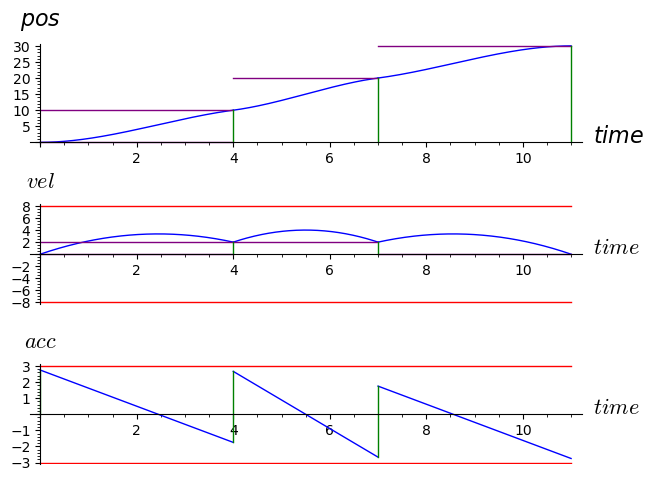

In [8]:
def plot_triple_pos(p1,p2,p3,p4,v1,v2,v3,v4,T1,T2,T3):
    #print(100*'#')
    
    graph_A =    plot( f(t)(p1=p1,p2=p2,v1=v1,v2=v2,T=T1),(t,0,T1) ,axes_labels=['$time$', '$pos$']) 
    
    graph_B =    plot( f(t-T1)(p1=p2,p2=p3,v1=v2,v2=v3,T=T2),(t,T1,T1+T2) ,axes_labels=['$time$', '$pos$']) 
    
    graph_C =    plot( f(t-(T1 + T2) )(p1=p3,p2=p4,v1=v3,v2=v4,T=T3),(t,T1+T2,T1+T2+T3) ,axes_labels=['$time$', '$pos$']) 

    p_1 =  plot( p1 ,(t,0,T1),color='purple')
    p_2 =  plot( p2 ,(t,0,T1),color='purple')
    p_3 =  plot( p3 ,(t,T1,T1+T2),color='purple')
    p_4 =  plot( p4 ,(t,T1+T2,T1+T2+T3),color='purple')
    
    l_1 = line([(0,0),     (0,p1)],color='green')
    l_2 = line([(T1,0),    (T1,p2)],color='green')
    l_3 = line([(T1+T2,0), (T1+T2,p3)],color='green')
    l_4 = line([(T1+T2+T3,0), (T1+T2+T3,p4)],color='green')
    
    return graph_A + graph_B + graph_C + p_1 + p_2 + p_3 + p_4 + l_1 + l_2 +l_3 + l_4
    #show( graph_A + graph_B + graph_C + p_1 + p_2 + p_3 + p_4 + l_1 + l_2 +l_3 + l_4)
    print(100*'#')

def plot_triple_vel(p1,p2,p3,p4,v1,v2,v3,v4,T1,T2,T3,v_max=None):
    #print(100*'#')
    
    graph_A = plot( f_vel(t)(p1=p1,p2=p2,v1=v1,v2=v2,T=T1),(t,0,T1)  ,axes_labels=['$time$', '$vel$']) 
    graph_B = plot( f_vel(t-T1)(p1=p2,p2=p3,v1=v2,v2=v3,T=T2),(t,T1,T1+T2) ,axes_labels=['$time$', '$vel$'])
    graph_C = plot( f_vel(t-(T1 + T2) )(p1=p3,p2=p4,v1=v3,v2=v4,T=T3),(t,T1+T2,T1+T2+T3) ,axes_labels=['$time$', '$vel$']) 
    
    v_1 =  plot( v1 ,(t,0,T1),color='purple')
    v_2 =  plot( v2 ,(t,0,T1),color='purple')
    v_3 =  plot( v3 ,(t,T1,T1+T2),color='purple')
    v_4 =  plot( v4 ,(t,T1+T2,T1+T2+T3),color='purple')
    
    l_1 = line([(0,0),     (0,v1)],color='green')
    l_2 = line([(T1,0),    (T1,v2)],color='green')
    l_3 = line([(T1+T2,0), (T1+T2,v3)],color='green')
    l_4 = line([(T1+T2+T3,0), (T1+T2+T3,v4)],color='green')
    
    v_upper_A = N(get_max_vel(p1=p1,p2=p2,v1=v1,v2=v2,T=T1) )
    v_lower_A = N(get_min_vel(p1=p1,p2=p2,v1=v1,v2=v2,T=T1) )

    v_upper_B = N(get_max_vel(p1=p2,p2=p3,v1=v2,v2=v3,T=T2) )
    v_lower_B = N(get_min_vel(p1=p2,p2=p3,v1=v2,v2=v3,T=T2) )

    v_upper_C = N(get_max_vel(p1=p3,p2=p4,v1=v3,v2=v4,T=T3) )
    v_lower_C = N(get_min_vel(p1=p3,p2=p4,v1=v3,v2=v4,T=T3) )
    
    
    if v_max == None:
        return graph_A + graph_B + graph_C + v_1 + v_2 + v_3 + v_4 + l_1 + l_2 +l_3 + l_4
        #show(  graph_A + graph_B + graph_C + v_1 + v_2 + v_3 + v_4 + l_1 + l_2 +l_3 + l_4)
    else:
        v_m_A = plot(  v_max ,(t,0,T1+T2+T3),color='red')
        v_m_B = plot( -v_max ,(t,0,T1+T2+T3),color='red')
        return graph_A + graph_B + graph_C + v_1 + v_2 + v_3 + v_4 + v_m_A + v_m_B + l_1 + l_2 +l_3 + l_4
        #show( graph_A + graph_B + graph_C + v_1 + v_2 + v_3 + v_4 + v_m_A + v_m_B + l_1 + l_2 +l_3 + l_4)
    
    print(f'upper_velocity_A = {v_upper_A}')
    print(f'lower_velocity_A = {v_lower_A}')

    print(f'upper_velocity_B = {v_upper_B}')
    print(f'lower_velocity_B = {v_lower_B}')
    
    print(f'upper_velocity_C = {v_upper_C}')
    print(f'lower_velocity_C = {v_lower_C}')    
    
    print(100*'#')
    
    

def plot_triple_acc(p1,p2,p3,p4,v1,v2,v3,v4,T1,T2,T3,a_max=None):
    #print(100*'#')
    
    graph_A = plot( f_acc(t)(p1=p1,p2=p2,v1=v1,v2=v2,T=T1),(t,0,T1)  ,axes_labels=['$time$', '$acc$']) 
    graph_B = plot( f_acc(t-T1)(p1=p2,p2=p3,v1=v2,v2=v3,T=T2),(t,T1,T1+T2) ,axes_labels=['$time$', '$acc$'])
    graph_C = plot( f_acc(t-(T1 + T2) )(p1=p3,p2=p4,v1=v3,v2=v4,T=T3),(t,T1+T2,T1+T2+T3) ,axes_labels=['$time$', '$acc$'])

    a_upper_A = N( f_acc(p1=p1,p2=p2,v1=v1,v2=v2,T=T1)(t=0) )
    a_lower_A = N( f_acc(p1=p1,p2=p2,v1=v1,v2=v2,T=T1)(t=T1) )
    
    a_upper_B = N( f_acc(p1=p2,p2=p3,v1=v2,v2=v3,T=T2)(t=0) )
    a_lower_B = N( f_acc(p1=p2,p2=p3,v1=v2,v2=v3,T=T2)(t=T2) )
    
    a_upper_C = N( f_acc(p1=p3,p2=p4,v1=v3,v2=v4,T=T3)(t=0) )
    a_lower_C = N( f_acc(p1=p3,p2=p4,v1=v3,v2=v4,T=T3)(t=T3) )    
    
    l_1 = line([(0,0),     (0,a_upper_A)],color='green')
    l_2 = line([(T1,min(a_lower_A,a_upper_B )),    (T1,max(a_lower_A,a_upper_B ))],color='green')
    l_3 = line([(T1+T2,min(a_lower_B,a_upper_C )),    (T1+T2,max(a_lower_B,a_upper_C ))],color='green')    
    
    if a_max == None:
        return graph_A + graph_B + graph_C + l_1 + l_2 +l_3
        #show( graph_A + graph_B + graph_C + l_1 + l_2 +l_3)
    else:
        a_m_A = plot(  a_max ,(t,0,T1+T2+T3),color='red')
        a_m_B = plot( -a_max ,(t,0,T1+T2+T3),color='red')
        return graph_A + graph_B + graph_C + a_m_A + a_m_B + l_1 + l_2 +l_3
        #show( graph_A + graph_B + graph_C + a_m_A + a_m_B + l_1 + l_2 +l_3)
    

        
    print(f'upper_acceleration_A = {a_upper_A}')
    print(f'lower_acceleration_A = {a_lower_A}')

    print(f'upper_acceleration_B = {a_upper_B}')
    print(f'lower_acceleration_B = {a_lower_B}')

    print(f'upper_acceleration_C = {a_upper_C}')
    print(f'lower_acceleration_C = {a_lower_C}')
    
    
    print(100*'#')

def show_triple_plots(p1,p2,p3,p4,v1,v2,v3,v4,T1,T2,T3,v_max=None,a_max=None):
     
    return   graphics_array ( 
        [
             plot_triple_pos(p1=p1,p2=p2,p3=p3,p4=p4,v1=v1,v2=v2,v3=v3,v4=v4,T1=T1,T2=T2,T3=T3)
            ,plot_triple_vel(p1=p1,p2=p2,p3=p3,p4=p4,v1=v1,v2=v2,v3=v3,v4=v4,T1=T1,T2=T2,T3=T3,v_max=v_max)
            ,plot_triple_acc(p1=p1,p2=p2,p3=p3,p4=p4,v1=v1,v2=v2,v3=v3,v4=v4,T1=T1,T2=T2,T3=T3,a_max=a_max) 
        ],3,1)
    
import numpy    

p = [ show_triple_plots( p1=0
                  ,p2=10
                  ,p3=20
                  ,p4=30
                  ,v1=0
                  ,v2=2
                  ,v3=2
                  ,v4=0
                  ,T1=4
                  ,T2=3
                  ,T3=4
                  ,v_max=8
                  ,a_max=3) for x in numpy.linspace(0,4,5)  ]

#sines = [plot(c*sin(x), (-2*pi,2*pi), color=Color(c,0,0), ymin=-1, ymax=1) for c in sxrange(0,1,.2)]
#animate(p)
p[2]


In [9]:
var('v_max')
var('a_max')


quickest_T_v1 = solve( extrem_vel == v_max , T)[0].rhs()
quickest_T_v0 = quickest_T_v1.limit(v1 = 0).limit(v2=0)

quickest_T_v2 =  solve( extrem_vel == v_max , T)[1].rhs()

quickest_T_a0_A = solve( a_at_0 == a_max , T)[0].rhs()
quickest_T_a0_B = solve( a_at_0 == a_max , T)[1].rhs()

quickest_T_aT_A = solve( a_at_T == a_max , T)[0].rhs()
quickest_T_aT_B = solve( a_at_T == a_max , T)[1].rhs()

print("smallest T for v1 = v2")
show( quickest_T_v0 )
print(100*'#')

print("smallest T for p1 != p2, with v_max")
show( quickest_T_v1 )
show( quickest_T_v2 )
print(100*'#')

print("T for p1 != p2, with a_max")
show( quickest_T_a0_A )
show( quickest_T_a0_B )
show( quickest_T_aT_A )
show( quickest_T_aT_B )

print(100*'#')

smallest T for v1 = v2


-3/2*(p1 - p2)/v_max

####################################################################################################
smallest T for p1 != p2, with v_max


-3*((p1 - p2)*v1 + (p1 - p2)*v2 + (p1 - p2)*v_max - sqrt(v1*v2 - (v1 + v2)*v_max + v_max^2)*(p1 - p2))/(v1^2 + v1*v2 + v2^2 + 3*(v1 + v2)*v_max)

-3*((p1 - p2)*v1 + (p1 - p2)*v2 + (p1 - p2)*v_max + sqrt(v1*v2 - (v1 + v2)*v_max + v_max^2)*(p1 - p2))/(v1^2 + v1*v2 + v2^2 + 3*(v1 + v2)*v_max)

####################################################################################################
T for p1 != p2, with a_max


-(2*v1 + v2 + sqrt(-6*a_max*p1 + 6*a_max*p2 + 4*v1^2 + 4*v1*v2 + v2^2))/a_max

-(2*v1 + v2 - sqrt(-6*a_max*p1 + 6*a_max*p2 + 4*v1^2 + 4*v1*v2 + v2^2))/a_max

(v1 + 2*v2 - sqrt(6*a_max*p1 - 6*a_max*p2 + v1^2 + 4*v1*v2 + 4*v2^2))/a_max

(v1 + 2*v2 + sqrt(6*a_max*p1 - 6*a_max*p2 + v1^2 + 4*v1*v2 + 4*v2^2))/a_max

####################################################################################################


10.6770782520313


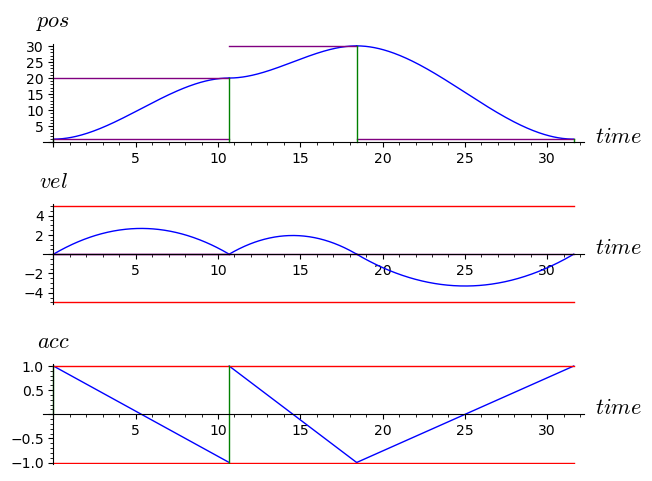

In [10]:
def smallest_T_v(p1,p2,v1,v2,v_max):

    best_T_v1 = quickest_T_v1(p1=p1, p2=p2, v1=v1 , v2=v2 ,v_max=v_max)

    if v1 == v_max or v2 == v_max:
        return best_T_v1.real()
    
    a_at_zero = f_acc(p1=p1, p2=p2, v1=v1 , v2=v2 , T=best_T_v1, t=0        )
    a_at_T    = f_acc(p1=p1, p2=p2, v1=v1 , v2=v2 , T=best_T_v1, t=best_T_v1)

    if a_at_zero * a_at_T > 0 or not(best_T_v1 in RR):
        best_T_v1 = None


    best_T_v2 = quickest_T_v2(p1=p1, p2=p2, v1=v1 , v2=v2 ,v_max=v_max)

    a_at_zero = f_acc(p1=p1, p2=p2, v1=v1 , v2=v2 , T=best_T_v2, t=0        )
    a_at_T    = f_acc(p1=p1, p2=p2, v1=v1 , v2=v2 , T=best_T_v2, t=best_T_v2)

    if a_at_zero * a_at_T > 0 or not(best_T_v2 in RR):
        best_T_v2 = None

    if best_T_v2 == None and best_T_v1 == None:
        print('failure')
        print(p1,p2,v1,v2,v_max)
        
    return max(best_T_v1,best_T_v2  )

def smallest_T_a(p1,p2,v1,v2,a_max):
    
    sol =   [quickest_T_a0_A(p1=p1,p2=p2,v1=v1,v2=v2,a_max=a_max )
                ,quickest_T_a0_B(p1=p1,p2=p2,v1=v1,v2=v2,a_max=a_max )
                ,quickest_T_aT_A(p1=p1,p2=p2,v1=v1,v2=v2,a_max=a_max )
                ,quickest_T_aT_B(p1=p1,p2=p2,v1=v1,v2=v2,a_max=a_max )
                ,quickest_T_a0_A(p1=p1,p2=p2,v1=v1,v2=v2,a_max=-a_max )
                ,quickest_T_a0_B(p1=p1,p2=p2,v1=v1,v2=v2,a_max=-a_max )
                ,quickest_T_aT_A(p1=p1,p2=p2,v1=v1,v2=v2,a_max=-a_max )
                ,quickest_T_aT_B(p1=p1,p2=p2,v1=v1,v2=v2,a_max=-a_max )
            ]
                
    ret = []
    for elm in sol:
        if elm in RR and elm >= 0:
            helper = f_acc(T=elm,p1=p1,p2=p2,v1=v1,v2=v2)

            if abs( helper(t=0) ) > 1.01*abs(a_max) or abs( helper(t=elm) ) > 1.01*abs(a_max):
                continue
            ret.append( N( elm  ) )
            
    return min(ret)

def get_best_T(p1,p2,v1,v2,v_max,a_max):
    
    if v1 == 0 and v2 == 0:
        best_T_v_pos = quickest_T_v0(p1=p1, p2=p2, v_max= v_max) 
        best_T_v_neg = quickest_T_v0(p1=p1, p2=p2, v_max=-v_max)
        
    elif p2 > p1:
        best_T_v_pos = N( smallest_T_v(p1=p1,p2=p2,v1=v1,v2=v2,v_max= v_max) )
        best_T_v_neg = N( smallest_T_v(p1=p1,p2=p2,v1=v1,v2=v2,v_max= v_max) )
    else:
        best_T_v_pos = N( smallest_T_v(p1=p1,p2=p2,v1=v1,v2=v2,v_max=-v_max) )
        best_T_v_neg = N( smallest_T_v(p1=p1,p2=p2,v1=v1,v2=v2,v_max=-v_max) )
        
    
    best_T_a_pos = N( smallest_T_a(p1=p1,p2=p2,v1=v1,v2=v2,a_max= a_max) )
    best_T_a_neg = N( smallest_T_a(p1=p1,p2=p2,v1=v1,v2=v2,a_max=-a_max) )
    #print('inside get_best_T')
    #print(best_T_v,best_T_a_pos,best_T_a_neg)
    
    #return max( best_T_v_pos,  best_T_v_neg )
    return max( best_T_v_pos,  best_T_v_neg,best_T_a_pos,best_T_a_neg )
    #return max(best_T_v, best_T_a_pos,best_T_a_neg)
    #return best_T_a


p_one = 1
p_two =  20
p_three =  30
p_four =  1

v_one =  0
v_two =  0
v_three = 0 
v_four = 0

v_m = 5
a_m = 1
    
T1_best = get_best_T(p1=p_one
                     ,p2=p_two
                     ,v1=v_one
                     ,v2=v_two
                     ,v_max=v_m
                     ,a_max=a_m)

T2_best = get_best_T(p1=p_two
                     ,p2=p_three
                     ,v1=v_two
                     ,v2=v_three
                     ,v_max=v_m
                     ,a_max=a_m)

T3_best = get_best_T(p1=p_three
                     ,p2=p_four
                     ,v1=v_three
                     ,v2=v_four
                     ,v_max=v_m
                     ,a_max=a_m)


print( T1_best )
show_triple_plots( p1=p_one
                  ,p2=p_two
                  ,p3=p_three
                  ,p4=p_four
                  
                  ,v1=v_one
                  ,v2=v_two
                  ,v3=v_three
                  ,v4=v_four
                  
                  ,T1=T1_best
                  ,T2=T2_best
                  ,T3=T3_best
                  
                  ,v_max=v_m
                  ,a_max=a_m) 


In [11]:
def create_zero_vel(ps):
    
    res = list( map(lambda x: {'pos': x,'vel':0,'t':None} , ps) )
    res = []
    for jdx,elm in enumerate(ps):
        res.append({'pos': elm,'vel':0,'t':None, 'jdx':jdx})
    
    res[0]['t'] = 0
    return list( res )


def create_initial_solution(pss):
    
    res = list (map( create_zero_vel ,pss ) )
    
    for idx in range(len(res)):
        for jdx in range(len(res[idx])):
            res[idx][jdx]['idx'] = idx
        
    return list(res)


create_initial_solution( [ [1,2,3,4] , [5,2,3,8]] ) 
#create_zero_vel( [-0.01,0,20,40,10,80,90,120,140,140.1] )

[[{'pos': 1, 'vel': 0, 't': 0, 'jdx': 0, 'idx': 0},
  {'pos': 2, 'vel': 0, 't': None, 'jdx': 1, 'idx': 0},
  {'pos': 3, 'vel': 0, 't': None, 'jdx': 2, 'idx': 0},
  {'pos': 4, 'vel': 0, 't': None, 'jdx': 3, 'idx': 0}],
 [{'pos': 5, 'vel': 0, 't': 0, 'jdx': 0, 'idx': 1},
  {'pos': 2, 'vel': 0, 't': None, 'jdx': 1, 'idx': 1},
  {'pos': 3, 'vel': 0, 't': None, 'jdx': 2, 'idx': 1},
  {'pos': 8, 'vel': 0, 't': None, 'jdx': 3, 'idx': 1}]]

In [12]:
# inspired by
# https://pages.uoregon.edu/dgavin/software/spline.pdf

def get_slope_b(t_p,y_p):
    
    points = len(t_p)

    if points ==2:
        return [0,0]
    
    
    res = points*[None]
    
    for i in range(points):

        if i==0 or i == points-1:
            res[i] = 0
            continue
            
        if (y_p[i+1]-y_p[i+0]) * (y_p[i+0]-y_p[i-1]) <= 0:
            res[i] = 0
            continue
        
        A = (t_p[i+1] - t_p[i+0])/(y_p[i+1]-y_p[i+0])
        
        B = (t_p[i+0] - t_p[i-1])/(y_p[i+0]-y_p[i-1])
        
        res[i] = 2 / ( A + B )
        
    return res

In [13]:
from scipy.interpolate import CubicSpline
import numpy as np
from scipy.interpolate import interp1d 

def limit(mini,x,maxi):
    
    return min(max(mini,x),maxi)

def do_T_map(p_mapped,config):
    T = []
    T_acc = 0
    axes_num = len(p_mapped)
    for j in range(len(p_mapped[0])-1):
        T = []
        for i in range(axes_num):
            p_1 = p_mapped[i][j+0]['pos']
            p_2 = p_mapped[i][j+1]['pos']
            
            v_1 = p_mapped[i][j+0]['vel']
            v_2 = p_mapped[i][j+1]['vel']
            
            v_m = config[i]['vel_max']
            a_m = config[i]['acc_max']

            T.append( get_best_T(p1=p_1,p2=p_2,v1=v_1,v2=v_2,v_max=v_m ,a_max=a_m) )
        
        T_max = N( max(T) )
        T_acc = T_acc + T_max

        for i in range(axes_num):
            p_mapped[i][j+1]['t'] = T_acc
        
    return p_mapped


def do_spline_v_map(p_mapped,config):
    
    axes_num = len(p_mapped)
    
    
    for i in range(axes_num):
          
        t_p = [x['t']   for x in p_mapped[i]  ]
        y_p = [x['pos'] for x in p_mapped[i]  ]

        cs = get_slope_b(t_p,y_p)

        for j in range(len(p_mapped[0])):

            p_mapped[i][j]['vel'] = limit( -config[i]['vel_max'] 

                                          , cs[j]

                                          , config[i]['vel_max'] 
                                         )

    return p_mapped


def iterator(p_mapped,config,num):
    #show(p_mapped)
    for rep in range(num):
        p_mapped = do_T_map(p_mapped,config) 
        #show(p_mapped)
        p_mapped = do_spline_v_map(p_mapped,config)
        #show(p_mapped)
    
    #p_mapped = do_T_map(p_mapped,config)
    
    return p_mapped





In [14]:
pss = [ [-0.01,0,20,40,10,80,90,120,140,140.1]  , [-0.01,0,3,4,60,80,50,105,140,140.1] ]
#pss = [ [0,1,2,3,4,5,6,7,8,9,10] ]
config = [ {'vel_max':1,'acc_max':1} , {'vel_max':2,'acc_max':.1} ] #,{'vel_max':1,'acc_max':20} ]

start = create_initial_solution(pss)
#show(start)


#p_mapped = do_T_map(start,config)
#p_mapped = do_spline_v_map(p_mapped,config)
res = iterator(start,config,10)
#print( res )
#pretty_print( res )

In [15]:
import pandas as pd

def print_panda(p_mapped):
    
    axes_num = len(p_mapped)
    
    t_p = [x['t']   for x in p_mapped[0]  ]
    
    data = { '_time_': t_p }
    
    for i in range(axes_num):
        
        y_p = [x['pos'] for x in p_mapped[i]  ]
        v_p = [x['vel'] for x in p_mapped[i]  ]
        
        data[f'pos_{i}   '] = y_p 
        data[f'vel_{i}   '] = v_p
 
    df = pd.DataFrame( data )
    
    return df

df = print_panda(res)
df

,_time_,pos_0,vel_0,pos_1,vel_1
0,0,-0.0100000000000000,0,-0.0100000000000000,0
1,0.508785918383007,0,0.0383177552126024,0,0.0335258411864198
2,26.8394371259935,20,0.754751330280218,3,0.0564273256530857
3,53.5063738592338,40,0,4,0.0724153716505996
4,106.790868436746,10,0,60,0.343831709654152
5,204.096675007875,80,0.355068014780512,80,0
6,246.523081879068,90,0.343016958441540,50,0
7,294.162326733212,120,0.604573146007324,105,1.08160276511733
8,328.565213101505,140,0.119685746339389,140,0.125209546778209
9,330.064241430535,140.100000000000,0,140.100000000000,0


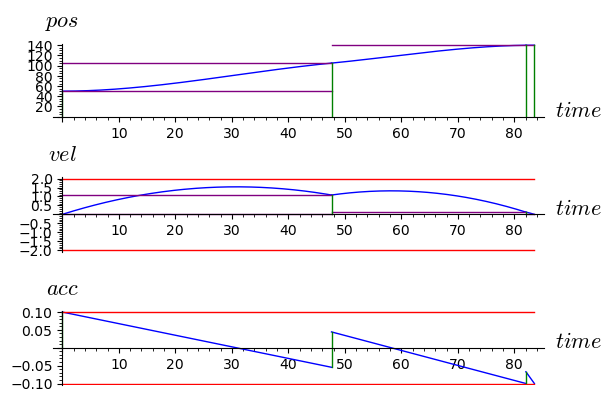

In [19]:
idx = 1
jdx = 6

v_m = config[idx]['vel_max']
a_m = config[idx]['acc_max']

p_one=   res[idx][jdx]['pos']
p_two=   res[idx][jdx+1]['pos']
p_three= res[idx][jdx+2]['pos']
p_four=  res[idx][jdx+3]['pos']

v_one=   res[idx][jdx]['vel']
v_two=   res[idx][jdx+1]['vel']
v_three= res[idx][jdx+2]['vel']
v_four=  res[idx][jdx+3]['vel']

T1 = res[idx][jdx+1]['t'] - res[idx][jdx+0]['t'] 
T2 = res[idx][jdx+2]['t'] - res[idx][jdx+1]['t']
T3 = res[idx][jdx+3]['t'] - res[idx][jdx+2]['t']


show_triple_plots( p1=p_one
                  ,p2=p_two
                  ,p3=p_three
                  ,p4=p_four
                  
                  ,v1=v_one
                  ,v2=v_two
                  ,v3=v_three
                  ,v4=v_four
                  
                  ,T1=T1
                  ,T2=T2
                  ,T3=T3
                  
                  ,v_max=v_m
                  ,a_max=a_m)


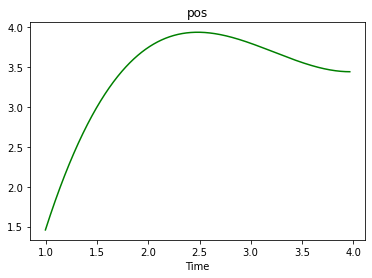

In [17]:
from scipy.interpolate import BPoly
import matplotlib.pyplot as plt
import numpy as np

t_values = [0.993333, 3.96768 ]
f_3MM       = BPoly.from_derivatives( t_values ,[[1.4579,4] , [3.44194,0]])
f_3MM_velo  = f_3MM.derivative()
f_3MM_acc   = f_3MM_velo.derivative()

plt.xlabel('Time')

plt.title('pos')
x = np.linspace(min(t_values),max(t_values),num=1000)
plt.plot(x,f_3MM(x), color = 'green')

plt.show()